# Importing the dataset

In [1]:
dataset = read.csv("Salary_data.csv")
# dataset = [, 2:3]
#dataset

# Taking care of missing data

In [2]:
#dataset$Age = ifelse(is.na(dataset$Age), ave(dataset$Age, FUN = function(x) mean(x, na.rm = TRUE)), dataset$Age)

# Encoding categorical data

In [3]:
#dataset$Country = factor(dataset$Country, levels = c('France', 'Spain', 'Germany'), labels = c(1,2,3))

# Splitting the dataset into the Training set and Test set

In [4]:
# options(repos='http://cran.rstudio.com/')
# install.packages('caTools')
library(caTools)
set.seed(42)
split = sample.split(dataset$Salary, SplitRatio = 2/3)
training_set = subset(dataset, split == TRUE)
test_set = subset(dataset, split == FALSE)
# training_set

# Feature Scaling

In [5]:
# training_set = scale(training_set)
# test_set = scale(test_set)

# Fitting simple linear regression to the training set

In [6]:
regressor = lm(formula = Salary ~ YearsExperience, data = training_set)
# summary(regressor)

# Predicting the test set results

In [7]:
y_pred = predict(regressor, newdata = test_set)
# y_pred

# Visualising the training set results

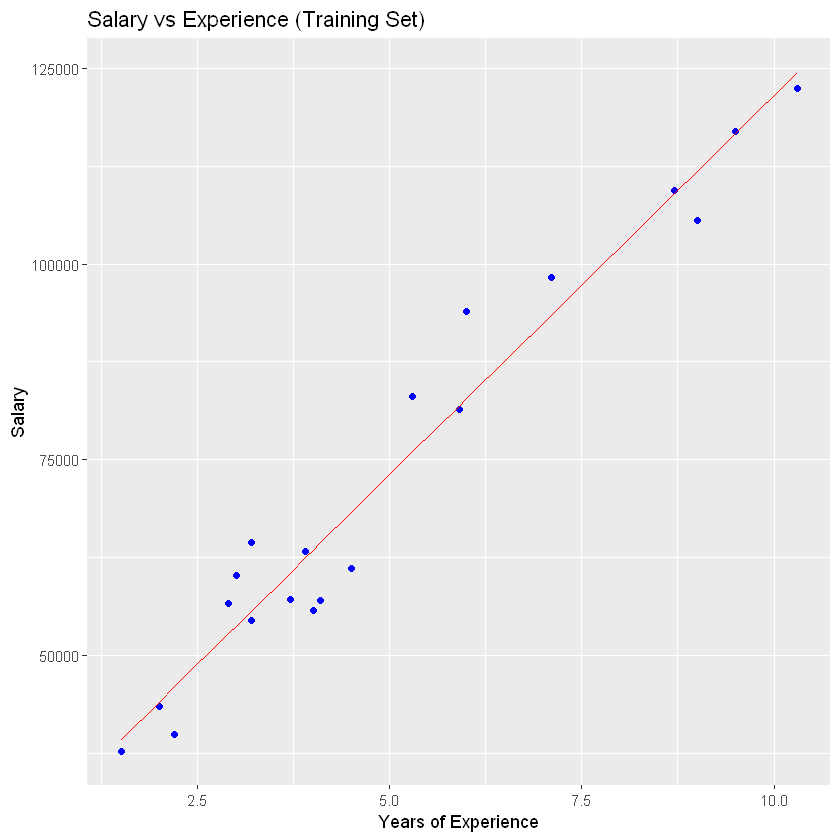

In [8]:
# options(repos='http://cran.rstudio.com/')
# install.packages('ggplot2')
library(ggplot2)
ggplot() + 
    geom_point(aes(x = training_set$YearsExperience, y = training_set$Salary), 
                colour = 'blue') + 
    geom_line(aes(x = training_set$YearsExperience, y = predict(regressor, newdata = training_set)), 
                colour = 'red') +
    ggtitle('Salary vs Experience (Training Set)') +
    xlab('Years of Experience') +
    ylab('Salary')

# Visualising the test set results

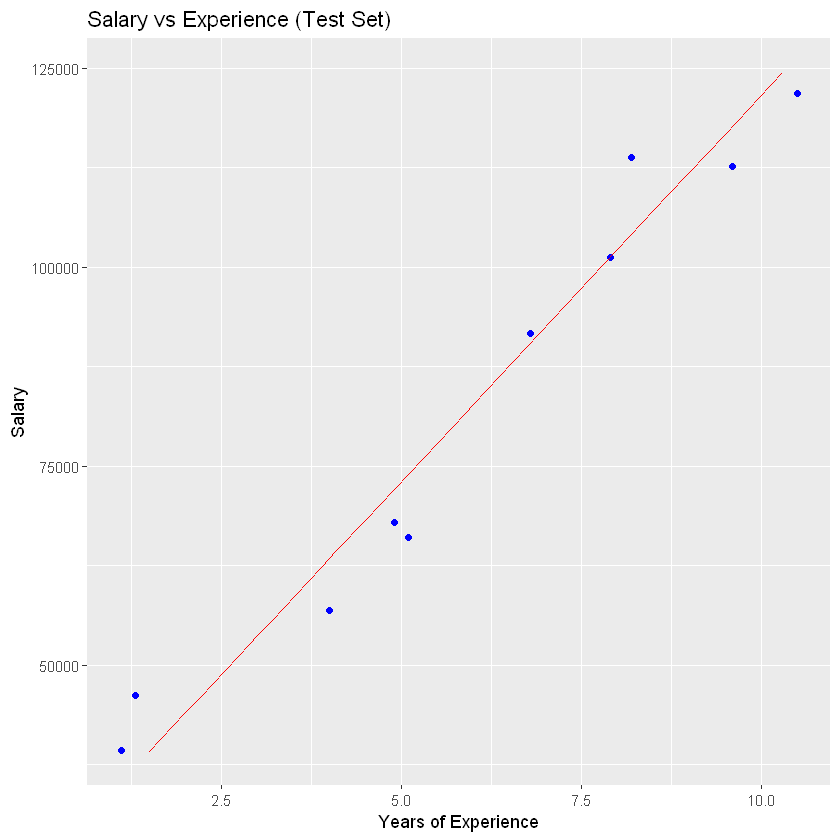

In [9]:
library(ggplot2)
ggplot() + 
    geom_point(aes(x = test_set$YearsExperience, y = test_set$Salary), 
                colour = 'blue') + 
    geom_line(aes(x = training_set$YearsExperience, y = predict(regressor, newdata = training_set)), # same line 
                colour = 'red') +
    ggtitle('Salary vs Experience (Test Set)') +
    xlab('Years of Experience') +
    ylab('Salary')

# Visualising predicted points and real points

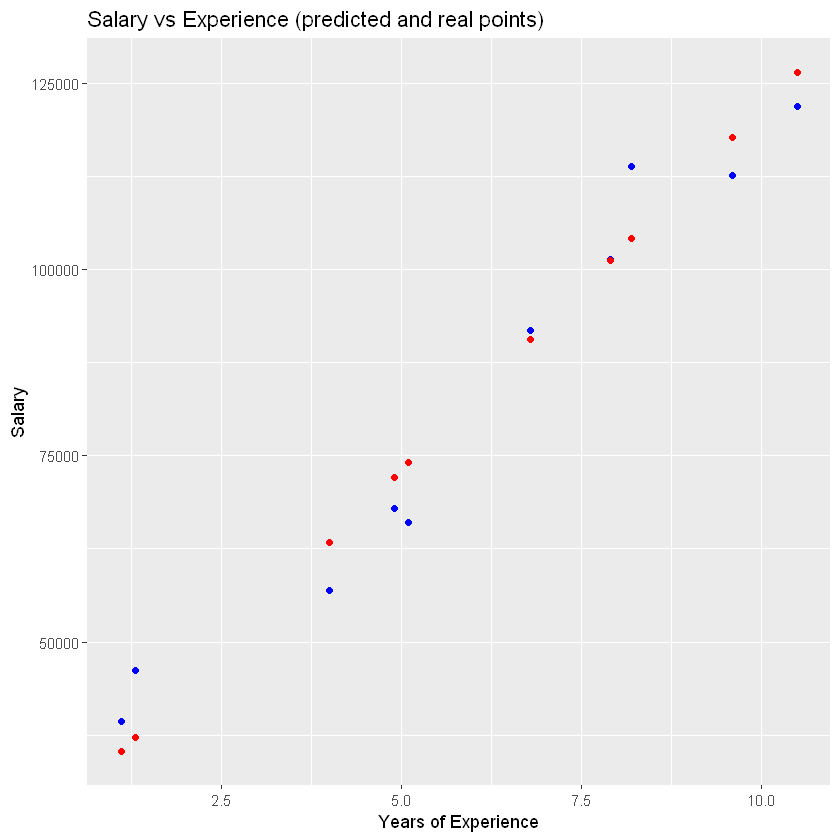

In [10]:
ggplot() + 
    geom_point(aes(x = test_set$YearsExperience, y = test_set$Salary), 
                colour = 'blue') + 
    geom_point(aes(x = test_set$YearsExperience, y = y_pred), 
                colour = 'red') +
    ggtitle('Salary vs Experience (predicted and real points)') +
    xlab('Years of Experience') +
    ylab('Salary')